
# Regresión Lineal

Tu vecina es un agente de bienes raíces y requiere de tu ayuda, para predecir los precios de la vivienda en regiones de los Estados Unidos. Sería genial, si de alguna manera, pudieras crear un modelo para ella, que le permita indicar algunas características de una casa y le devuelva una estimación del precio en que se podría vender la casa.  

Ella te preguntó si podrías ayudarla con tus nuevas habilidades de ciencia de datos. ¡Dices sí y decides que la regresión lineal podría ser un buen camino para resolver este problema!  

Luego, tu vecina te brinda la información sobre un grupo de casas en regiones de los Estados Unidos; todo está en el conjunto de datos: USA_Housing.csv.

Los datos contienen las siguientes columnas:

* 'Avg. Area Income': Ingreso promedio de los residentes en la ciudad donde esta ubicada la casa.
* 'Avg. Area House Age': Edad promedio de las casas en la misma ciudad
* 'Avg. Area Number of Rooms': Número promedio de habitaciones para casas en la misma ciudad
* 'Avg. Area Number of Bedrooms': Número promedio de recámaras para casas en la misma ciudad
* 'Area Population': Población de la ciudad donde esta ubicada la casa
* 'Price': precio al que se vendió la casa
* 'Address': Dirección de la casa

## Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar Datos

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Análisis Exploratorio de Datos (EDA)



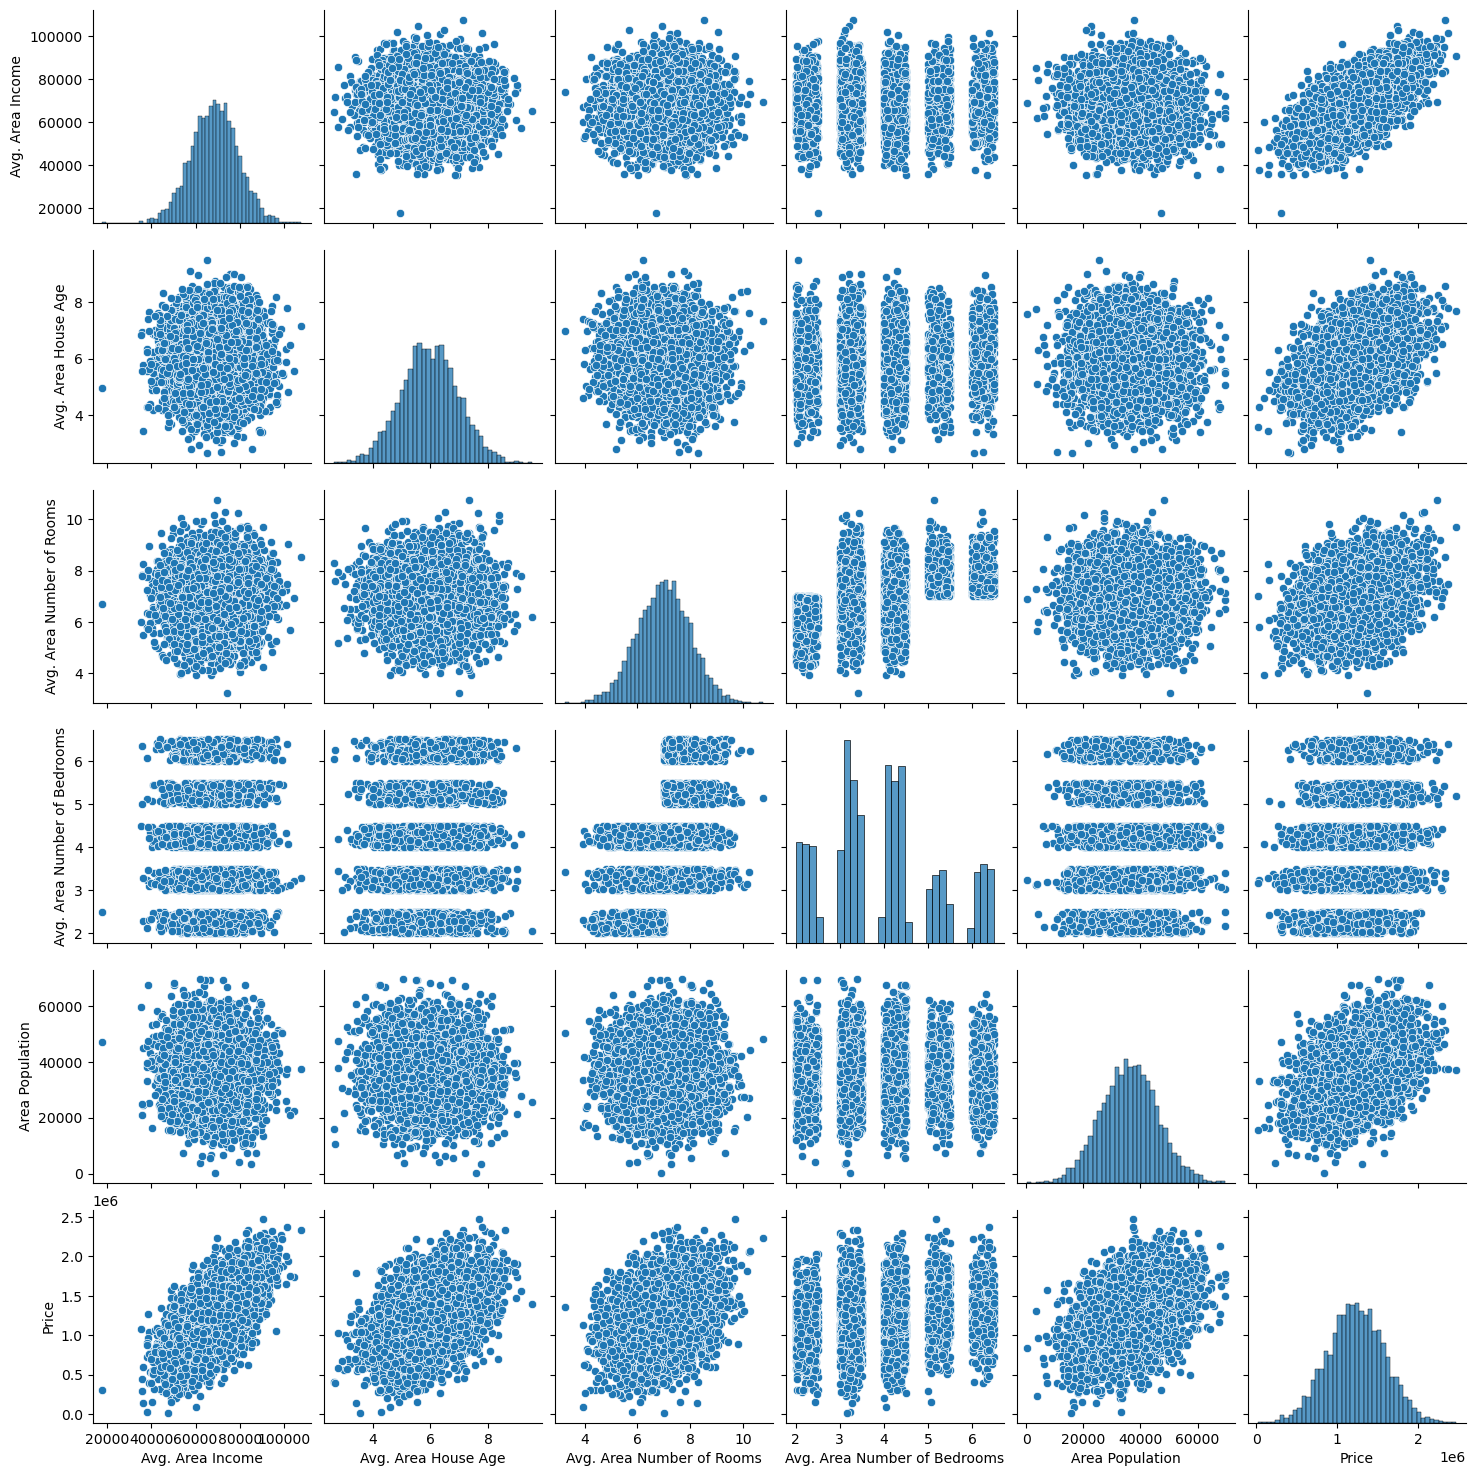

In [7]:
sns.pairplot(USAhousing)

<Axes: xlabel='Price', ylabel='Count'>

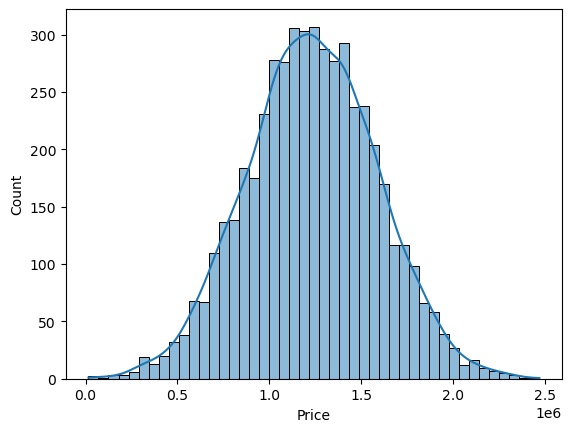

In [8]:
sns.histplot(USAhousing['Price'], kde=True)

<Axes: >

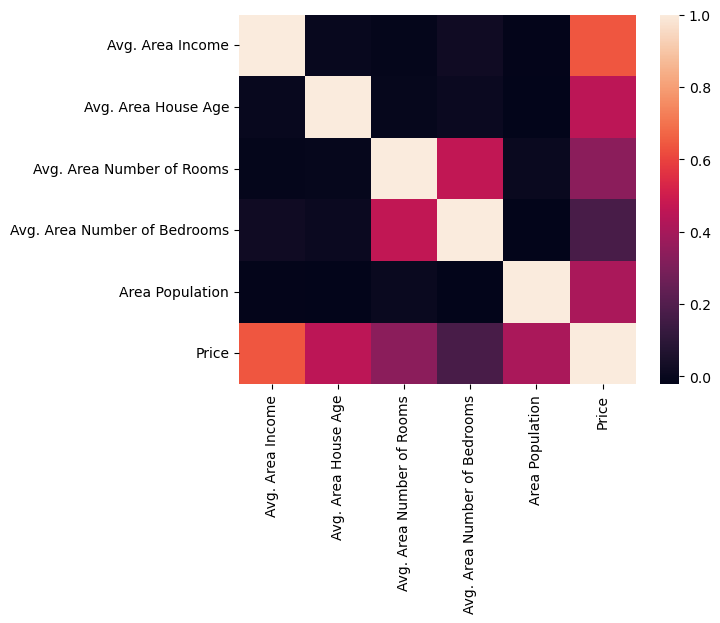

In [9]:
USAhousing2 = USAhousing.drop(columns=['Address'])
sns.heatmap(USAhousing2.corr())

## Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba

In [10]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Crear el modelo

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

## Evaluar el Modelo

Vamos a evaluar el modelo comprobando sus coeficientes y cómo podemos interpretarlos.

In [16]:
print(lm.intercept_)

-2642239.251234694


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.570413
Avg. Area House Age           166552.477670
Avg. Area Number of Rooms     119512.534382
Avg. Area Number of Bedrooms    2758.951878
Area Population                   15.296861


## Interpretando los coeficientes:

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Avg. Area Income** está asociado con un aumento de **$21.57**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Avg. Area House Age** está asociado con un aumento de **$166552.47**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Avg. Area Number of Rooms** está asociado con un aumento de **$119512.53**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Avg. Area Number of Bedrooms** está asociado con un aumento de **$2758.95**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Area Population** se asocia con un aumento de **$15.29**.  

¿Esto tiene sentido?



## Predicciones del Modelo



In [18]:
predictions = lm.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

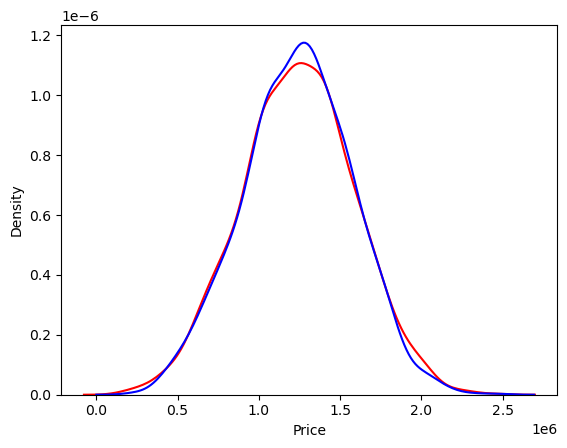

In [19]:
ax1 = sns.kdeplot(y_test, color="r")
sns.kdeplot(predictions, color="b", ax=ax1)

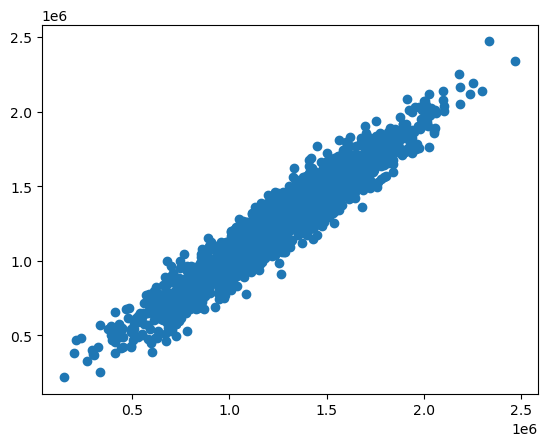

In [20]:
plt.scatter(y_test,predictions)

**Histograma de Residuos**

<Axes: xlabel='Price', ylabel='Count'>

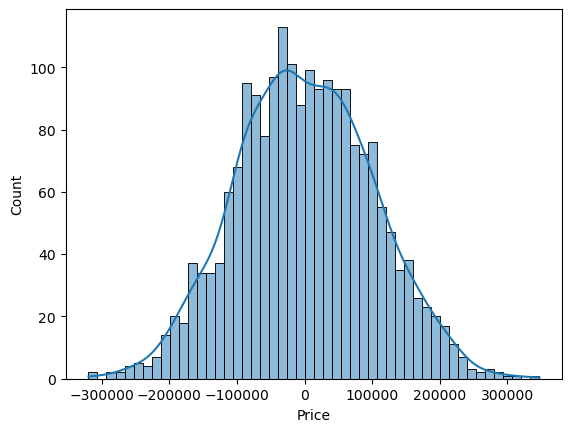

In [21]:
sns.histplot((y_test-predictions), kde=True, bins=50)

## Métricas de evaluación para problemas de regresión:
    
**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- ** MAE ** es el más fácil de entender, porque es el error promedio.
- ** MSE ** es más popular que MAE, porque MSE "castiga" errores más grandes, lo que tiende a ser útil en el mundo real.
- ** RMSE ** es aún más popular que MSE, porque RMSE es interpretable en las unidades "y".

Todas estas son ** funciones de pérdida **, porque queremos minimizarlas.

In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81331.22699573654
MSE: 10119734875.653337
RMSE: 100596.89297216559
